# Projeto Final
## Base de dados **Hotel Reservations**
- https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

#### Submissão: [Google-Forms](https://forms.gle/kKjVGvuboHb4LD4S9)
#### Prazo de envio: **09/12/2024**

In [ ]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Hotel-Reservations.csv')
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


## Exercício 1: Utilizando a função apply
Crie uma nova coluna chamada `stay_duration` a partir da soma de `no_of_weekend_nights` e `no_of_week_nights`.

In [2]:
df['stay_duration'] = df['no_of_weekend_nights'] + df['no_of_week_nights']
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,stay_duration
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,3
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,5
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,3
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,2
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled,8
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled,4
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled,8
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled,3


## Exercício 2: Utilizando a função transform
- Aplique a normalização (escalonamento entre 0 e 1) Min-Max na coluna `avg_price_per_room`.
- **Normalização Min-Max**:
$
x' = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}
$

### Onde:
- \( $x$ \): Valor original.
- \( $x'$ \): Valor normalizado (entre 0 e 1).
- \( $x_{\text{min}}$ \): Valor mínimo do conjunto de dados.
- \( $x_{\text{max}}$ \): Valor máximo do conjunto de dados.



In [4]:
df['avg_price_per_room_nmz'] = df['avg_price_per_room'].transform(lambda x: (x - x.min()) / (x.max() - x.min()))
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,stay_duration,avg_price_per_room_nmz
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,...,2,Offline,0,0,0,65.00,0,Not_Canceled,3,0.120370
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,...,6,Online,0,0,0,106.68,1,Not_Canceled,5,0.197556
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,...,28,Online,0,0,0,60.00,0,Canceled,3,0.111111
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,...,20,Online,0,0,0,100.00,0,Canceled,2,0.185185
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,...,11,Online,0,0,0,94.50,0,Canceled,2,0.175000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,...,3,Online,0,0,0,167.80,1,Not_Canceled,8,0.310741
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,...,17,Online,0,0,0,90.95,2,Canceled,4,0.168426
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,...,1,Online,0,0,0,98.39,2,Not_Canceled,8,0.182204
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,...,21,Online,0,0,0,94.50,0,Canceled,3,0.175000


## Exercício 3: Substituições com replace e regex
Altere a coluna `room_type_reserved` extraindo apenas os números da coluna.

In [ ]:
df['room_type_reserved_num'] = df['room_type_reserved'].str.replace(r'\D', '', regex=True)
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,stay_duration,avg_price_per_room_nmz,room_type_reserved_num
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,...,Offline,0,0,0,65.00,0,Not_Canceled,3,0.120370,1
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,...,Online,0,0,0,106.68,1,Not_Canceled,5,0.197556,1
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,...,Online,0,0,0,60.00,0,Canceled,3,0.111111,1
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,...,Online,0,0,0,100.00,0,Canceled,2,0.185185,1
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,...,Online,0,0,0,94.50,0,Canceled,2,0.175000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,...,Online,0,0,0,167.80,1,Not_Canceled,8,0.310741,4
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,...,Online,0,0,0,90.95,2,Canceled,4,0.168426,1
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,...,Online,0,0,0,98.39,2,Not_Canceled,8,0.182204,1
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,...,Online,0,0,0,94.50,0,Canceled,3,0.175000,1


## Exercício 4: Gráfico Mapa de Calor
Faça a plotagem do Mapa de calor (**Heatmap**) entre as colunas numéricas

In [9]:
df.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
stay_duration                             int64
avg_price_per_room_nmz                  

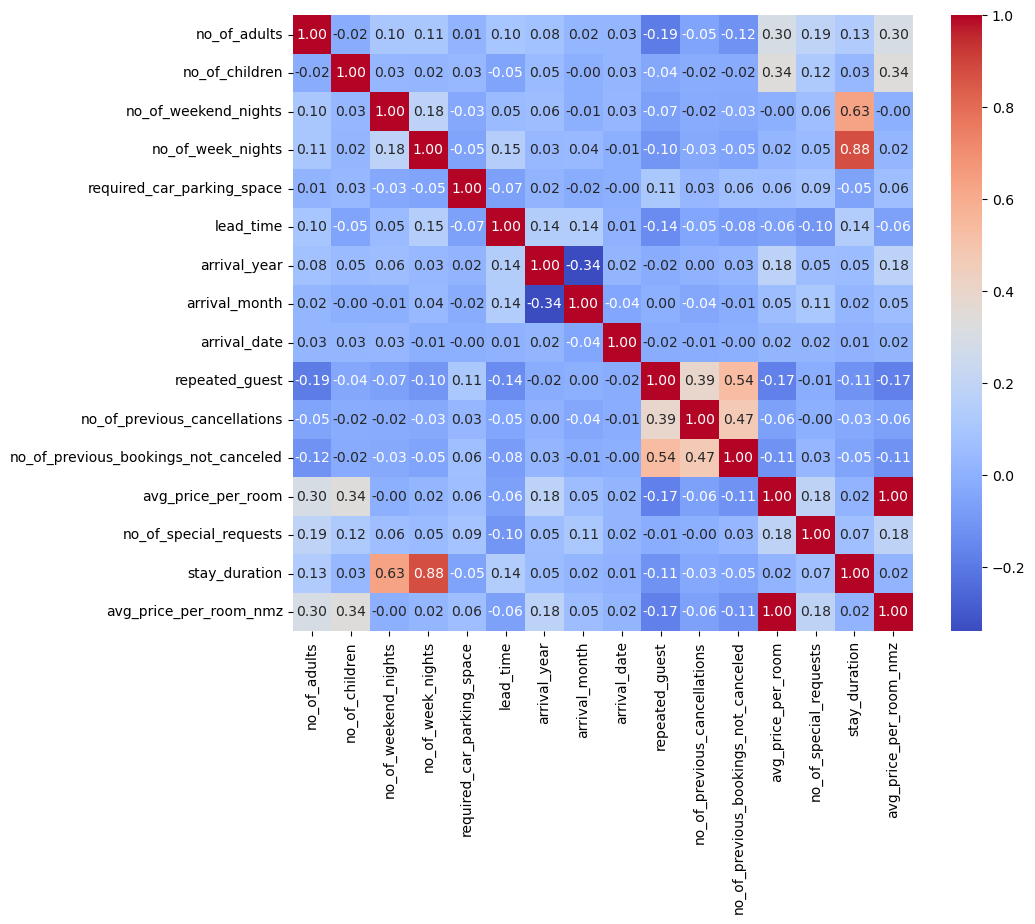

In [14]:
df_heat = df.select_dtypes(include=['float64','int64'])
plt.figure(figsize=(10,8))
sns.heatmap(df_heat.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

## Exercício 5: Expressões Regulares
Altere a coluna `Booking_ID`, extraindo apenas os números da coluna.

In [15]:
df['Booking_ID_sem_numeros'] = df['Booking_ID'].str.replace(r'\d', '', regex=True)
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,stay_duration,avg_price_per_room_nmz,room_type_reserved_num,Booking_ID_sem_numeros
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,...,0,0,0,65.00,0,Not_Canceled,3,0.120370,1,INN
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,...,0,0,0,106.68,1,Not_Canceled,5,0.197556,1,INN
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,...,0,0,0,60.00,0,Canceled,3,0.111111,1,INN
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,...,0,0,0,100.00,0,Canceled,2,0.185185,1,INN
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,...,0,0,0,94.50,0,Canceled,2,0.175000,1,INN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,...,0,0,0,167.80,1,Not_Canceled,8,0.310741,4,INN
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,...,0,0,0,90.95,2,Canceled,4,0.168426,1,INN
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,...,0,0,0,98.39,2,Not_Canceled,8,0.182204,1,INN
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,...,0,0,0,94.50,0,Canceled,3,0.175000,1,INN


## Exercício 6: Gráfico de Dispersão
Faça a plotagem com a relação entre `lead_time` e `avg_price_per_room` (sem a normalização).

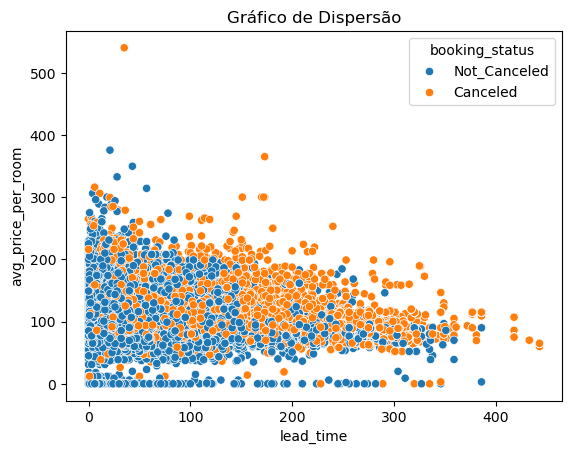

In [ ]:
sns.scatterplot(df, x='lead_time', y='avg_price_per_room', hue='booking_status')
plt.title('Gráfico de Dispersão')
plt.ylabel('avg_price_per_room')
plt.xlabel('lead_time')
plt.show()

## Exercício 7: Groupby e Agg
Calcule o preço médio (`avg_price_per_room`), sem normalização, por tipo de quarto (`room_type_reserved`).

In [21]:
df.groupby(['room_type_reserved']).agg(amout_mean=('avg_price_per_room','mean')).reset_index()

,room_type_reserved,amout_mean
0,Room_Type 1,95.918532
1,Room_Type 2,87.848555
2,Room_Type 3,73.678571
3,Room_Type 4,125.287317
4,Room_Type 5,123.733623
5,Room_Type 6,182.212836
6,Room_Type 7,155.198291


## Exercício 8: Boxplot
Apresente o boxplot com os dados de preço médio (`avg_price_per_room`), sem normalização, por tipo de quarto (`room_type_reserved`).

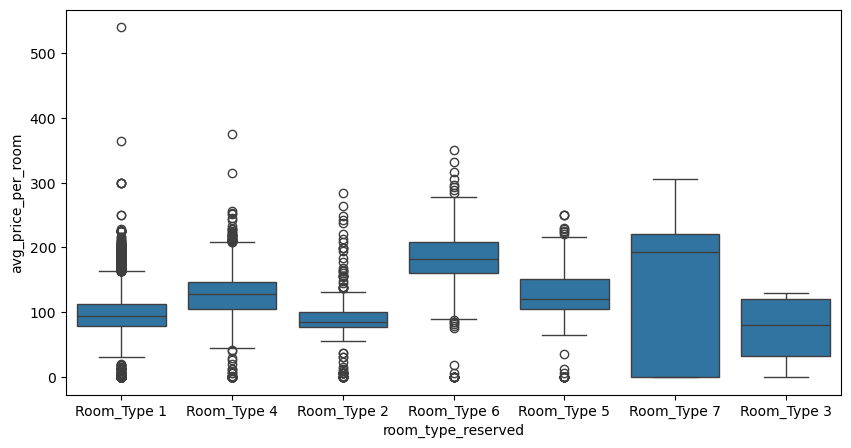

In [29]:
plt.figure(figsize=(10,5))
sns.boxplot(df, x='room_type_reserved', y='avg_price_per_room')
plt.show()